Objectives

1. Building an anomaly detection model based on the given data
2. Evaluating the results of my anomaly detection model

Before we can get any work done we have to import all necessary packages and libraries. Given we are working with anomaly detection in an unsupervised dataset in python, the following are the ones I'll be using (Of course a few are added after I decided on how to approach the problem).

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.ensemble import IsolationForest
from scipy.stats import poisson

I'm going to start by doing some exploration just to get an idea of what I'm working with. 

In [61]:
df = pd.read_csv("takehome_challenge.csv")
print("Dataset Shape:", df.shape)
df.head(10)

Dataset Shape: (100655, 42)


,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,tcp,http,SF,181,5450,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0
1,1,0,tcp,http,SF,239,486,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0
2,2,0,tcp,http,SF,235,1337,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
3,3,0,tcp,http,SF,219,1337,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0
4,4,0,tcp,http,SF,217,2032,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0
5,5,0,tcp,http,SF,217,2032,0,0,0,...,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0
6,6,0,tcp,http,SF,212,1940,0,0,0,...,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0
7,7,0,tcp,http,SF,159,4087,0,0,0,...,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0
8,8,0,tcp,http,SF,210,151,0,0,0,...,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0
9,9,0,tcp,http,SF,212,786,0,0,0,...,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100655 entries, 0 to 100654
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   100655 non-null  int64  
 1   duration                     100655 non-null  int64  
 2   protocol_type                100655 non-null  object 
 3   service                      100655 non-null  object 
 4   flag                         100655 non-null  object 
 5   src_bytes                    100655 non-null  int64  
 6   dst_bytes                    100655 non-null  int64  
 7   land                         100655 non-null  int64  
 8   wrong_fragment               100655 non-null  int64  
 9   urgent                       100655 non-null  int64  
 10  hot                          100655 non-null  int64  
 11  num_failed_logins            100655 non-null  int64  
 12  logged_in                    100655 non-null  int64  
 13 

In [63]:
df.describe()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,100655.00000,100655.000000,1.006550e+05,1.006550e+05,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,...,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000
mean,50327.00000,209.438925,1.199219e+03,3.272278e+03,0.000010,0.000268,0.000030,0.043614,0.000189,0.695047,...,152.028424,201.503333,0.841138,0.055454,0.153514,0.023384,0.009344,0.008335,0.057842,0.055998
std,29056.74001,1336.874459,3.733994e+04,3.694749e+04,0.003152,0.027296,0.009456,0.848936,0.020668,0.460390,...,103.446959,87.841631,0.310926,0.177841,0.306625,0.049238,0.089608,0.086446,0.225456,0.219588
min,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25163.50000,0.000000,1.460000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40.000000,169.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50327.00000,0.000000,2.320000e+02,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,174.000000,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75490.50000,0.000000,3.170000e+02,2.012000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,255.000000,255.000000,1.000000,0.010000,0.090000,0.030000,0.000000,0.000000,0.000000,0.000000
max,100654.00000,58329.000000,5.133876e+06,5.134218e+06,1.000000,3.000000,3.000000,30.000000,4.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So quickly I can see some unnecessary columns like Unnamed: 0 and num_outbound_cmds so I'll have to deal with them. Since we have 42 columns some form of dimensionality reduction methods like PCA can be useful to reduce some noise and simplify our data a bit to make sure our models are able to give us substancial insights. 

In [64]:
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    print(df[col].value_counts())

protocol_type
tcp     77774
udp     19187
icmp     3694
Name: count, dtype: int64
service
http           61900
smtp            9598
private         8238
domain_u        5862
other           5652
ftp_data        3808
ecr_i           2740
urp_i            537
finger           469
eco_i            400
ntp_u            380
ftp              374
telnet           225
auth             221
pop_3             79
time              52
IRC               42
urh_i             14
X11                9
domain             6
ssh                5
remote_job         3
nntp               3
rje                3
netbios_ssn        3
login              3
netbios_ns         2
daytime            2
tim_i              2
gopher             2
pop_2              2
mtp                2
courier            2
iso_tsap           1
uucp_path          1
http_443           1
echo               1
imap4              1
red_i              1
csnet_ns           1
exec               1
bgp                1
efs                1
uucp   

protocol_type only has 3 values so I can use one-hot encoding, service on the other hand has a lot more so I'll group some of them into "other" for ease. flag is mostly dominated by SF and REJ, but I still grouped the rare ones to keep the important signals and reduce noise and extra dimensions. 

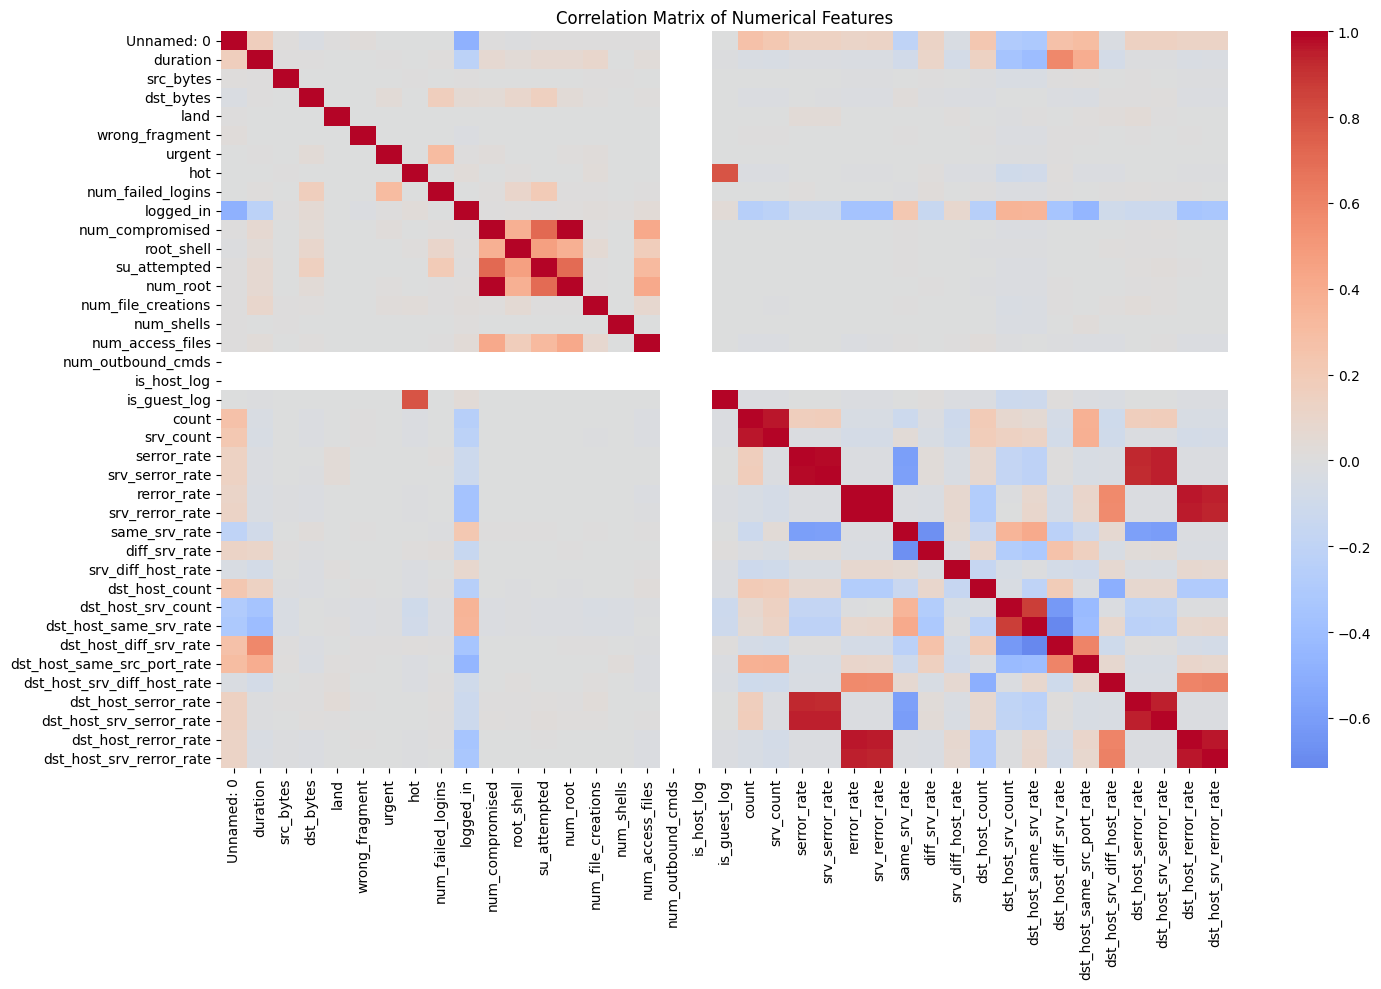

In [65]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

So I see some strong positive correlations such as with serror_rate and srv_serror_rate, as well as some negative ones like dst_host_same_srv_rate and dst_host_diff_serv_rate. I also see huge portions with little to no correlation, which reinforced my decision to apply PCA for compression. Now that exploration is done, I can start preprocessing. 

In [66]:
#Getting rid of unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
df.drop(columns=['num_outbound_cmds'], inplace=True, errors='ignore')

In [67]:
#Grouping rare 'service' categories
#I'm using one-hot encoding and used a frequency based thresholding for the new other category

top_services = df['service'].value_counts().nlargest(20).index
df['service'] = df['service'].where(df['service'].isin(top_services), 'other')

In [68]:
#Grouping rare 'flag' categories
top_flags = df['flag'].value_counts().nlargest(10).index
# I decided on keeping the top 10 flags

df['flag'] = df['flag'].where(df['flag'].isin(top_flags), 'other_flag')

In [69]:
#One hot encoding categorical features
categorical_features = ['protocol_type', 'service', 'flag']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("Shape after encoding:", df_encoded.shape)

Shape after encoding: (100655, 67)


In [70]:
#Scaling numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

print("Shape after scaling:", scaled_data.shape)

Shape after scaling: (100655, 67)


In [71]:
#PCA
pca = PCA(n_components=0.95, random_state=42)  # keep 95% variance
X_pca = pca.fit_transform(scaled_data)

print("New PCA shape:", X_pca.shape)
print(f"Variance: {pca.explained_variance_ratio_.sum():.2%}")

New PCA shape: (100655, 39)
Variance: 95.26%


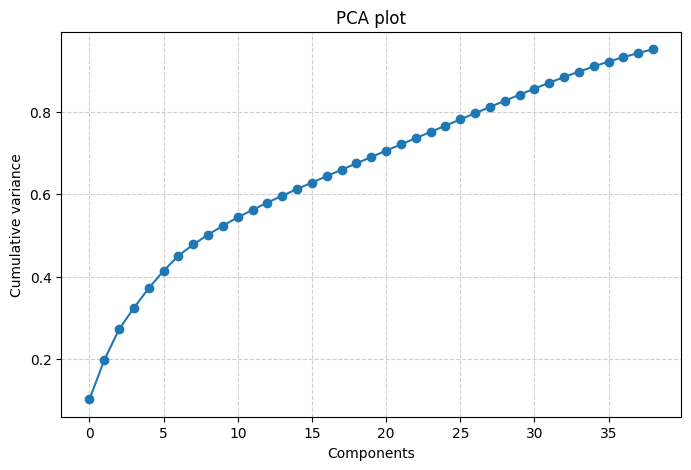

In [72]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Components")
plt.ylabel("Cumulative variance")
plt.title("PCA plot")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

From the graph we can see by the steep rise that the first 5-10 components capture a lot of variance, meaning a small set of linear combinations already summarized much of the structure in the dataset. After 15-20 components, each new one adds less incremental variance and after 39 the curve flattens so we have a decent balance of information and efficiency. 

So when it came to actually building the anomaly detector I initially tried a few random popular unsupervised models, I did not have extensive cybersecurity experience outside of hiding my phone password from my girlfriend(just kidding I don't have a girlfriend, maybe I need to stay away from cybersecurity). But I did have to do plenty of research on things like what linear combinations were considered funky in this field, the fact that there were initially 42 components per vector made it obvious that the data was high dimensional and even redundant at times, which made PCA really useful. 

After looking into the subject a bit more I found out things like a combination of high count, srv_count and diff_srv_rate can be problematic because it can be a sign of a port scan or network sweep. Another combination one was high src_byters, dst_bytes and serror_rate because it suggests DoS attack or exfiltration attempt. There were a few others but you get the idea. 

In addition, given that I was asked a poisson question in my previous interview it only made to incorporate it in some way, especially considering how I can I see where it can potentially fit. 

After some trial and deliberation I decided my ensemble for the detector is going to be consisted of Gaussian Mixutre Model(GMM), Isolation Forest(IF), and Poisson Model(PM). 

My motivation for choosing each is as follows: GMM is useful because it provides a probalisitc interpretation since anomalies are unlikely events to begin with. GMM estimates the probability density of the data as a mixture of gaussian distributions and the points in low-density regions would then be my anomalies. Isolation forest is a fan favorite when it comes to unsupervised datasets, particularly because it's great for high dimensional datasets like the one we have, it's efficient and generally catches outliers that don't fit anywhere. IF will help me isolate data points by randomly splitting features and my anomalies are isolated faster meaning fewer splits. When I saw num_failed_logins not only was I happy because it was one of the few columns whose definition I knew initially, but also because I saw how I can use it to my advantage so I chose the poisson model because it will help us find classic attacks like brute-force login attempts. What I mainly want from the poisson is to compare observed counts against expected counts, so higher counts than the mean would obviously be an anomaly. 

Some other models I've tried are local outlier factor (LOF) and One-Class SVM. LOF struggled with the duplicate points in my dataset and was also a bit unstable in higher dimensions, whereas SVM was very sensitive to parameter tuning and also did not scale well here. 

In [73]:
#Fitting GMM
gmm = GaussianMixture(n_components = 5, covariance_type = "full", random_state = 42)
gmm.fit(X_pca)
gmm_scores = -gmm.score_samples(X_pca)

In [74]:
#Fitting IF
iso = IsolationForest(contamination = 0.05, random_state = 42)
iso.fit(X_pca)
iso_scores = -iso.decision_function(X_pca)

In [75]:
#Fitting PM
mu = df["num_failed_logins"].mean()

#Used the survival function for P(X >= k)
#Added a small epsilon to avoid log(0)
poisson_scores = -np.log(poisson.sf(df["num_failed_logins"], mu) + 1e-12)

In [76]:
#Combining into ensemble by normalizing then averaging
def normalize(scores):
    return MinMaxScaler().fit_transform(np.array(scores).reshape(-1,1)).flatten()

scores_df = pd.DataFrame({
    "GMM": normalize(gmm_scores),
    "IsolationForest": normalize(iso_scores),
    "Poisson": normalize(poisson_scores)
})

scores_df["Consensus"] = scores_df.mean(axis = 1)
print(scores_df.describe())

                 GMM  IsolationForest        Poisson      Consensus
count  100655.000000    100655.000000  100655.000000  100655.000000
mean        0.001919         0.112033       0.000077       0.038010
std         0.007652         0.138073       0.007840       0.047014
min         0.000000         0.000000       0.000000       0.000163
25%         0.000467         0.015038       0.000000       0.005190
50%         0.000558         0.061211       0.000000       0.020685
75%         0.001347         0.150887       0.000000       0.051079
max         1.000000         1.000000       1.000000       0.736544


So the consensus score is highly skewed with most values clustered near zero which makes sense since most of the data is consisted of normal traffic so a good majority of the entries present themseleves as ordinary to all 3 models. 

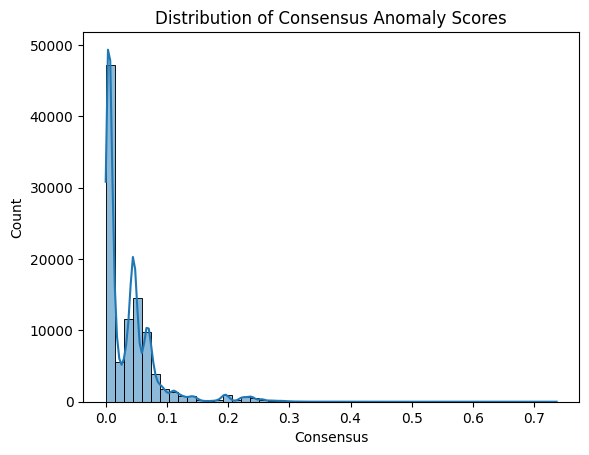

In [77]:
sns.histplot(scores_df["Consensus"], bins = 50, kde = True)
plt.title("Distribution of Consensus Anomaly Scores")
plt.show()

The distributions shows a strong peak of normal activity(the low scores) whereas the long tail shows incresasingly anomalous connections. For our intents and purposes the separation means our model has learned normal network behavior and identified significant outliers for us to investigate. 

In [79]:
#Top 20 anomalies
top_n = 20
top_idx = scores_df.nlargest(top_n, "Consensus").index
top_20_anomalies = df.iloc[top_idx]
print("Top 20 anomalies:")
pd.set_option("display.max_columns", None)
print(top_20_anomalies)
pd.reset_option("display.max_columns")

Top 20 anomalies:
       duration protocol_type  service  flag  src_bytes  dst_bytes  land  \
39455      2399           tcp   telnet    SF       2238     460350     0   
67215      4746           tcp   telnet    SF       1794    3851730     0   
37961       143           tcp   telnet    SF        142        324     0   
67008     14383           tcp   telnet  RSTR       9161      14903     0   
71966       189           tcp     smtp  RSTR          0          0     0   
93910        33           tcp   telnet  RSTR         39         51     0   
36730        26           tcp   telnet    SF        106        244     0   
41583        19           tcp   telnet    SF        158        226     0   
71785     13232           tcp      IRC  RSTR       1856       9173     0   
61417      7993           tcp      IRC  RSTR        773       6955     0   
65050     29296           tcp      IRC  RSTR       3281      10214     0   
97855         0           tcp   telnet  RSTO        126        179    

Our results look promising, we found numerous anomalies like password attacks like in rows 39455, 67215, 37961, 36730 and 41583. We also found things like long durations and IRC service in rows 71785, 61417, 65050, 38499, and 85749, which signified command and control activities. 

So to summarize what we have done, we applied PCA to reduce 67 features down to 39, we fit three anomaly detections models, namely: Gaussian Mixture Model, Isolation Forest, and Poisson. We also built a consensus ensemble score by averaging normalized outputs. Finally we identified the top 20 anomalies which included things like rejected http requests(flag=REJ), unusually large FTP transfers (service = ftp_data) and high failed login attempts, thus we have fulfilled all our desired objectives. 